# Machine Learning Python Exercise 1.2: Linear Regression with multiple variables

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plotting
import numpy.matlib
import statistics

import os
print(os.listdir("../ex1"))

['.ipynb_checkpoints', 'Coursera_MachineLearningPython_ex1.zip', 'ex1data1.txt', 'ex1data2.txt', 'ex1_part_1.ipynb', 'ex1_part_2_multi.ipynb', 'ex1_try1.ipynb', 'Machine_Learning_ex1_python_old.zip', 'Untitled.ipynb']


## Instructions
    
This file contains code that helps you get started on the exercise. You will need to complete functions in this exercise. The instructions can be found in this notebook, which will load the program as you complete the exercises. If you need to change the code in a certain section, it will be clearly indicated.

In [2]:
# Loading data
data = np.array(pd.read_csv('ex1data2.txt', sep=",", header=None)) # import data
X = np.array(data[:,0:2].reshape((47,2)),dtype=float)   # initialize data X in 47x2 array
y = np.array(data[:,2].reshape((47,1)),dtype=float)     # initialize data y in 47x1 array
m = len(y)                        # initialize value for m

print('First 10 examples from the dataset: \n')
for i in range(10): # 10 examples are printed using a loop over the print statement
    print(' x = [%g %g], y = %g \n' % (X[i,0], X[i,1], y[i])) 

First 10 examples from the dataset: 

 x = [2104 3], y = 399900 

 x = [1600 3], y = 329900 

 x = [2400 3], y = 369000 

 x = [1416 2], y = 232000 

 x = [3000 4], y = 539900 

 x = [1985 4], y = 299900 

 x = [1534 3], y = 314900 

 x = [1427 3], y = 198999 

 x = [1380 3], y = 212000 

 x = [1494 3], y = 242500 



### Complete this featureNormalize file: (@Rik this part still seems bugged but Coursera accepts it as correct)
featureNormalize(X) returns a normalized version of X where the mean value of each feature 0 and the standard deviation is 1. This is often a good pre-processing step to do when working with learning algorithms.

In [3]:
# You need to set these values correctly
X_norm = X
mu = np.zeros((1, X.shape[1]))
sigma = np.zeros((1, X.shape[1]))

#### Instructions
First, for each feature dimension, compute the mean of the feature and subtract it from the dataset, storing the mean value in mu. Next, compute the standard deviation of each feature and divide each feature by its standard deviation, storing the standard deviation in sigma. 

Note that X is a matrix where each column is a feature and each row is an example. You need to perform the normalization separately for each feature.

In [4]:
def featureNormalize(X):
    ## Your code
    
    # Correct answer
    # mu and sigma
    for p in range(X.shape[1]):
        mu[:,p] = np.mean(X[:,p])
        sigma[:,p] = np.std(X[:,p])
        
    # X_norm
    for p in range(len(X)):
        for i in range(len(X[p])):
            X_norm[p,i] = (X_norm[p,i] - mu[:,i])/sigma[:,i] #(X_norm-mean)/std
    return X_norm, mu, sigma
        
    # incorrect try    
    #m1 = np.mean((X[:,0])) # mean of first column
    #m2 = np.mean((X[:,1])) # mean of second column
    #mu = np.stack((m1,m2), axis=0) # horizontally concatenate m1 and m2 in mu
    #

    #s1 = np.std(X[:,0]) # standard deviation of first colum
    #s2 = np.std(X[:,1]) # standard deviation of second colum
    #sigma = np.stack((s1,s2), axis=0)     # horizontally concatenate s1 and s2 in sigma

    
    #for i in range(len(mu)):
     #   for j in range(len(X)):
      #      X_norm[j,i] = ((X[j,i]-np.mean(X[:,i]))/np.std(X[:,i]))
    #return X_norm, mu, sigma

## Part 1: Feature Normalization

In [5]:
X, mu, sigma = featureNormalize(X) # return values into X, mu, sigma

# Add column of ones to X
ones = np.ones((len(X))) # initialize array with ones size 91x1
X = np.c_[ones,X]        # add a column of ones to x
theta = np.zeros((2,1))  # initialize fitting parameters

### Paste you computeCost function here

In [6]:
# Initialize some useful values
m = len(y) # number of training examples

# Instructions: Compute the cost of a particular choice of theta using computeCost(X, y, theta).

def computeCost(x,y,theta):                                 # define function to reference later
    ## Your code
    
    # correct answer
    error = ((np.dot(x,theta)-y))                           # define first part of squared error function
    error_transpose = ((error.conj().T))                # define transpose of error
    return (1/(2*m) * (np.dot(error_transpose,error)))  # have the function return the value of the cost

### Paste you gradientDescent function here

In [7]:
def gradientDescent(x,y,theta,alpha,num_iters):
    # Initialize some useful values
    m = len(y) # number of training examples
    xTrans = x.transpose() # defines transpose of X
    J_history = np.zeros((num_iters,1))
    for i in range(0, num_iters):
        ## Your answer
        # Correct answer
        h = np.dot(x, theta) # X * theta
        loss = h - y         # X * theta - y
        # avg gradient per example
        gradient = np.dot(xTrans, loss)
        # update
        theta = theta - alpha/m * gradient
        
        ## End of your answer
        # Saves costs in J_history
        J_history[i] = np.sum(loss ** 2) / (2 * m)   # cost function J

    return theta, J_history

## Part 2: Gradient Descent

In [8]:
# choose some alpha and iteration value
alpha = 1
num_iters = 400

# initialize theta and run gradient descent
theta = np.zeros((3,1))
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

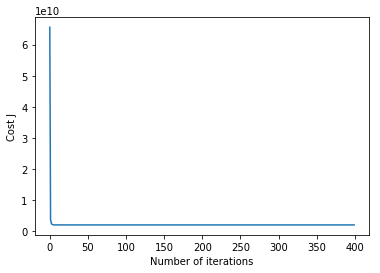

Theta computed from gradient descent: 

 340412.659574 
 109447.796470 
 -6578.354854 



In [9]:
# Plot convergence graph
plt.figure()
x_axis = np.arange(len(J_history))
plt.plot(np.transpose(x_axis), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
# Set the limits of the plot if necessary
# plt.ylim(2000000000, 5000000000)
# plt.autoscale(False)
plt.show()

print('Theta computed from gradient descent: \n')
print(' %f \n %f \n %f \n' % (theta[0], theta[1], theta[2]))


### Complete this prediction
Estimate the price of a 1650 sq-ft, 3 br house.

In [10]:
price = 0
## Your code

# Correct answer
price = np.dot(np.array([1,(1650-mu[:,0])/sigma[:,0], (3-mu[:,1])/sigma[:,1]]), theta) # normalized data

print('Predicted price of a 1650 sq-ft, 3 br house (using ' 
      'gradient descent):\n %f \n' % price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 293081.464335 



## Part 3: Normal Equations

In [11]:
print('Solving with normal equations...\n')
data = np.array(pd.read_csv('ex1data2.txt', sep=",", header=None))
X = data[:,0:2].reshape((47,2)) # initialize data X
y = data[:,2].reshape((47,1))   # initialize data y
m = len(y)                      # initialize value for m

def normalEqn(X,y):
    ## Your code here
    
    # Correct answer
    ones = np.ones((len(y))) # initialize array with ones size 91x1
    X = np.c_[ones,X]        # add a column of ones to x
    theta = np.zeros((X.shape[1],1))  # initialize fitting parameters
    
    xTx = X.T.dot(X)
    XtX = np.linalg.inv(xTx)
    XtX_xT = XtX.dot(X.T)
    theta = XtX_xT.dot(y)
    return theta

theta = normalEqn(X,y) # theta = (X'*X)^-1*X'*y

# Display normal equation's result
print('Theta computed from the normal equations: \n')
print(' %f \n %f ' % (theta[0], theta[1]));
print('\n');

#Estimate the price of a 1650 sq-ft, 3 br house
######### Complete this prediction
## Your code

# correct answer
price = np.dot([1, 1650, 3],theta)

print('Predicted price of a 1650 sq-ft, 3 br house ' 
         '(using normal equations):\n %f\n' % price)



Solving with normal equations...

Theta computed from the normal equations: 

 89597.909543 
 139.210674 


Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 293081.464335

